### Import basic modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [2]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [3]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# # df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [4]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [5]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_1002705/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')
/tmp/ipykernel_1002705/2795104614.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset_revised_new.csv')


In [6]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


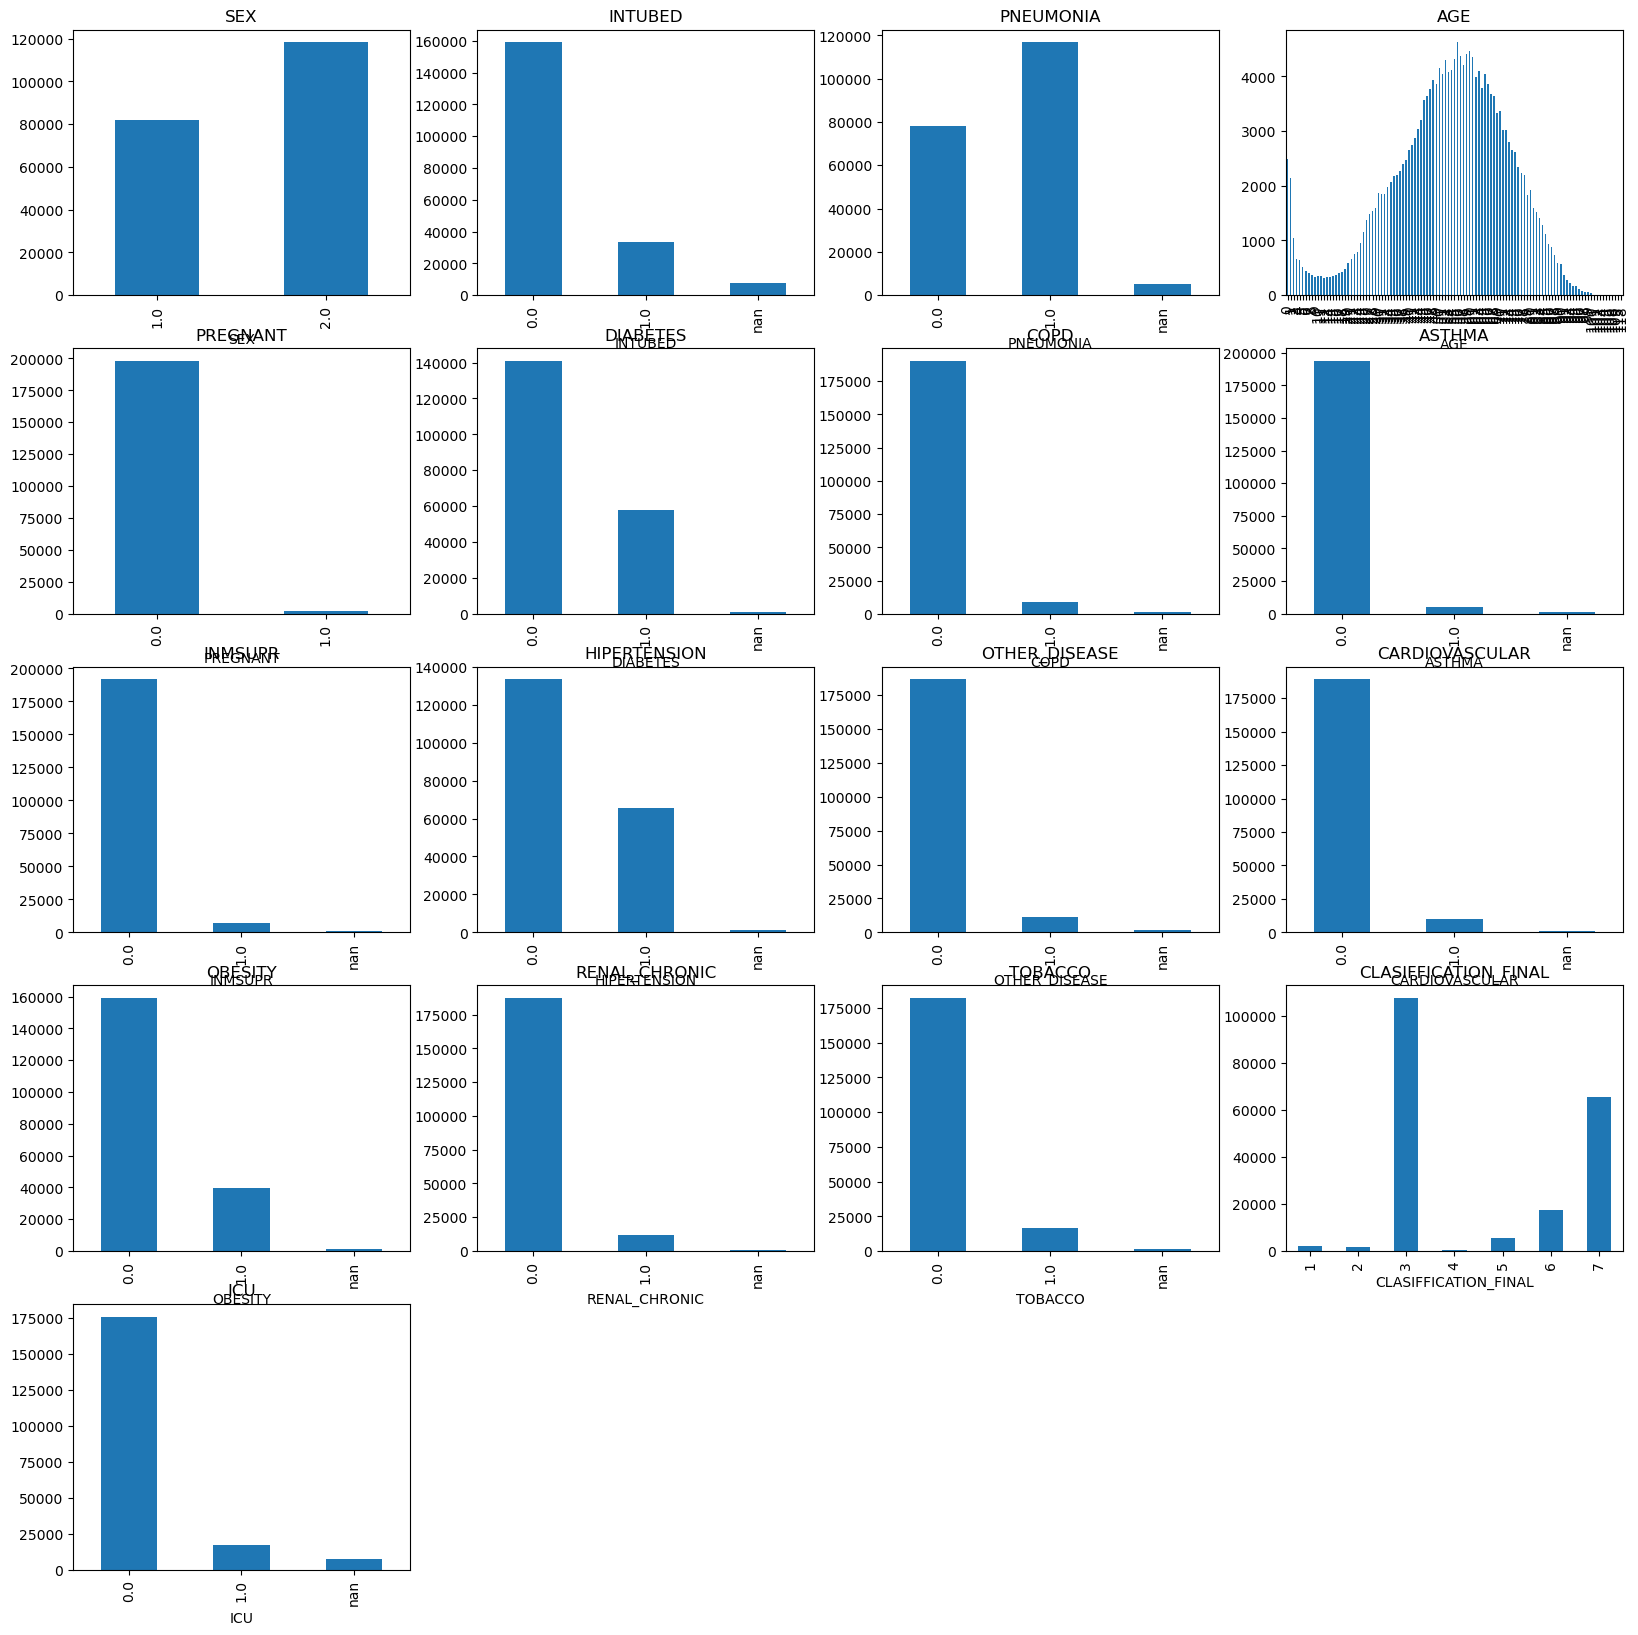

In [7]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

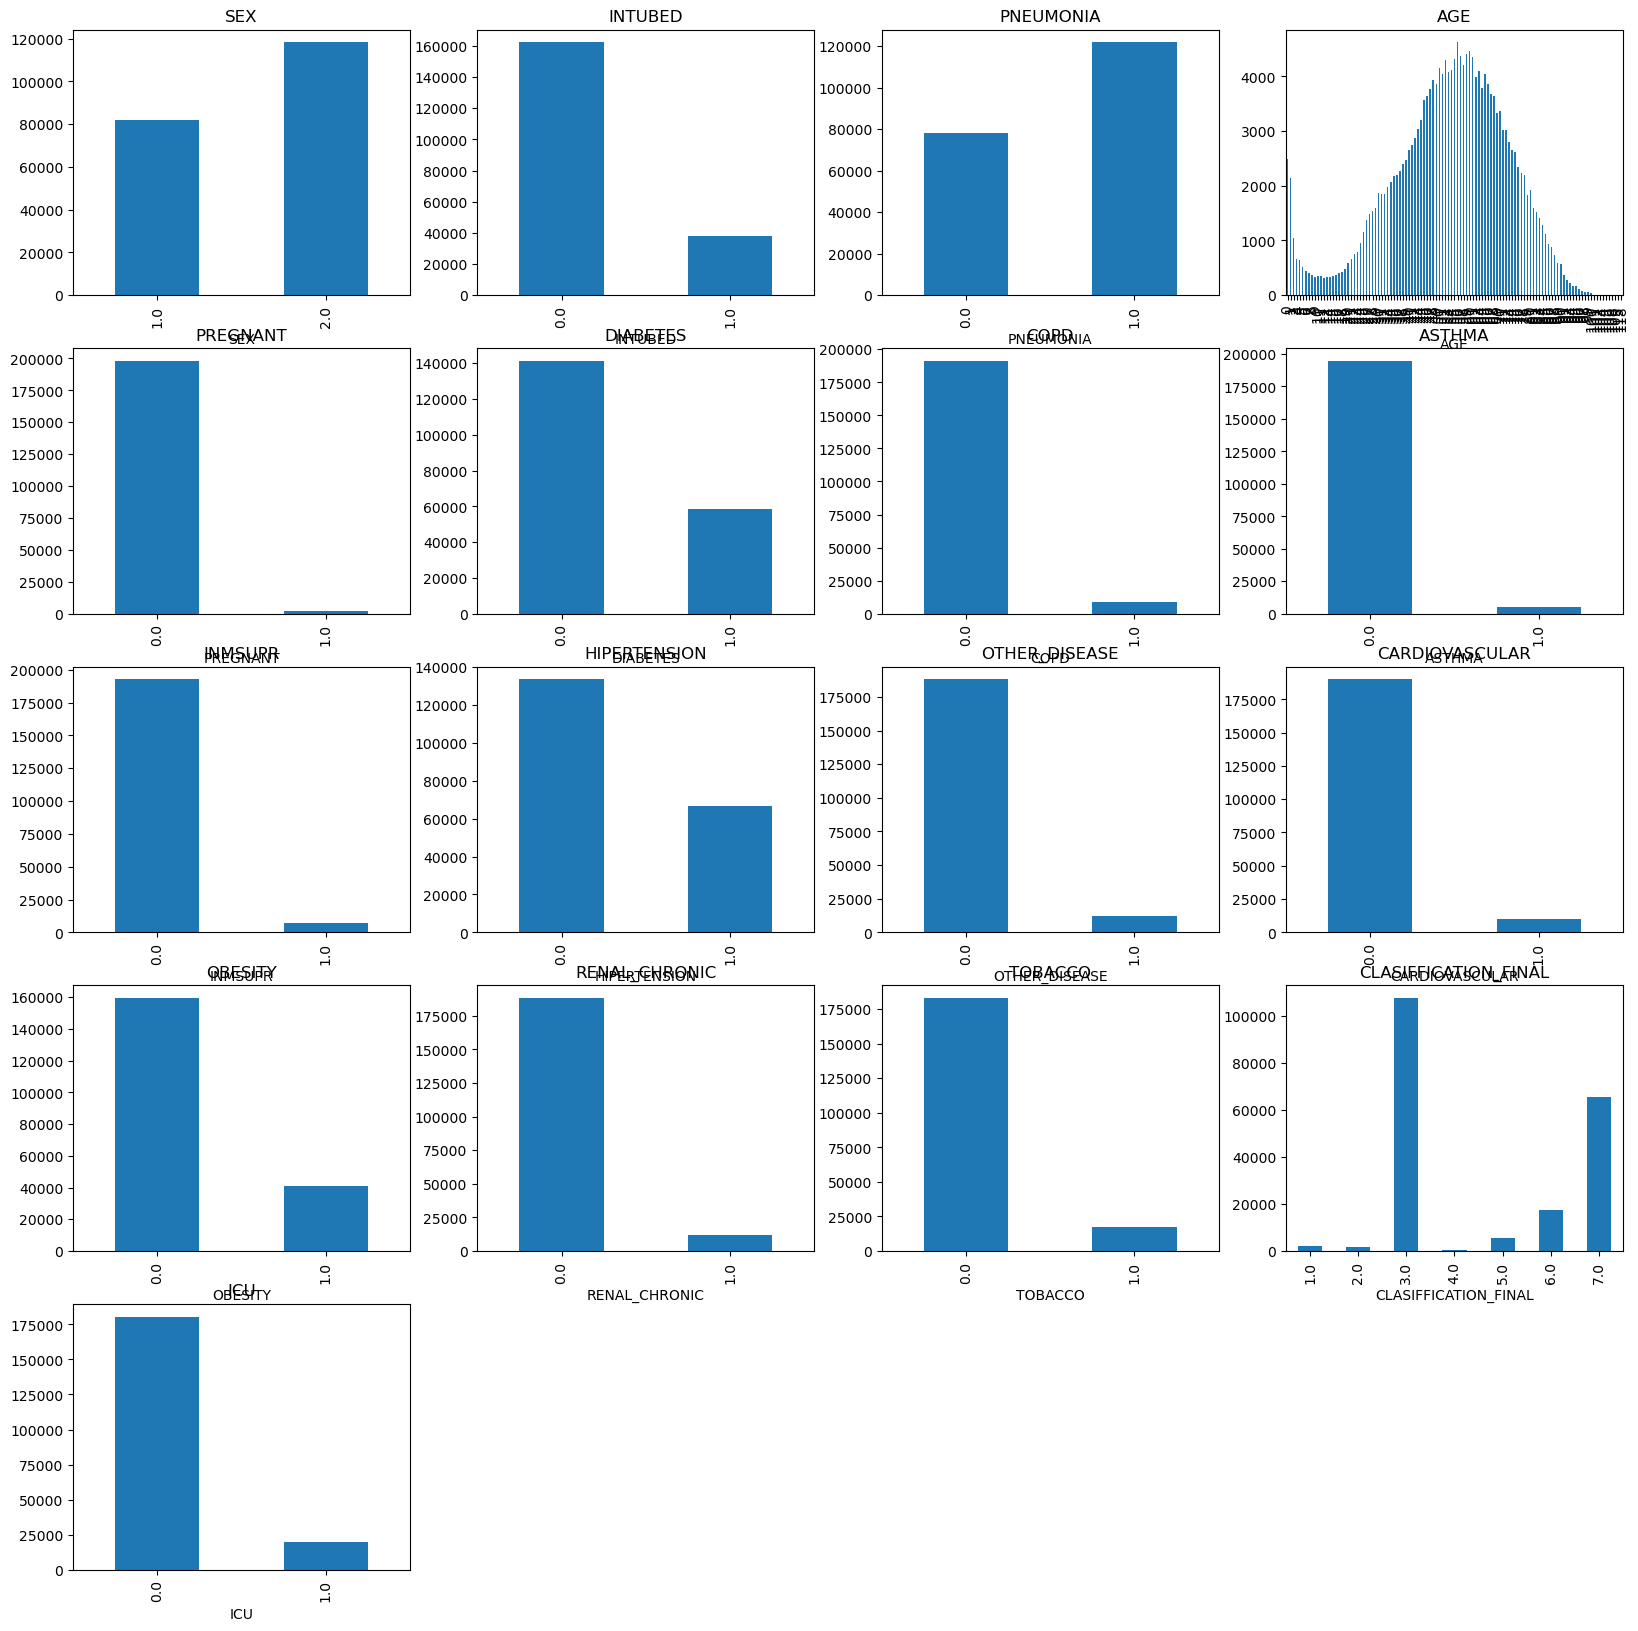

In [8]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

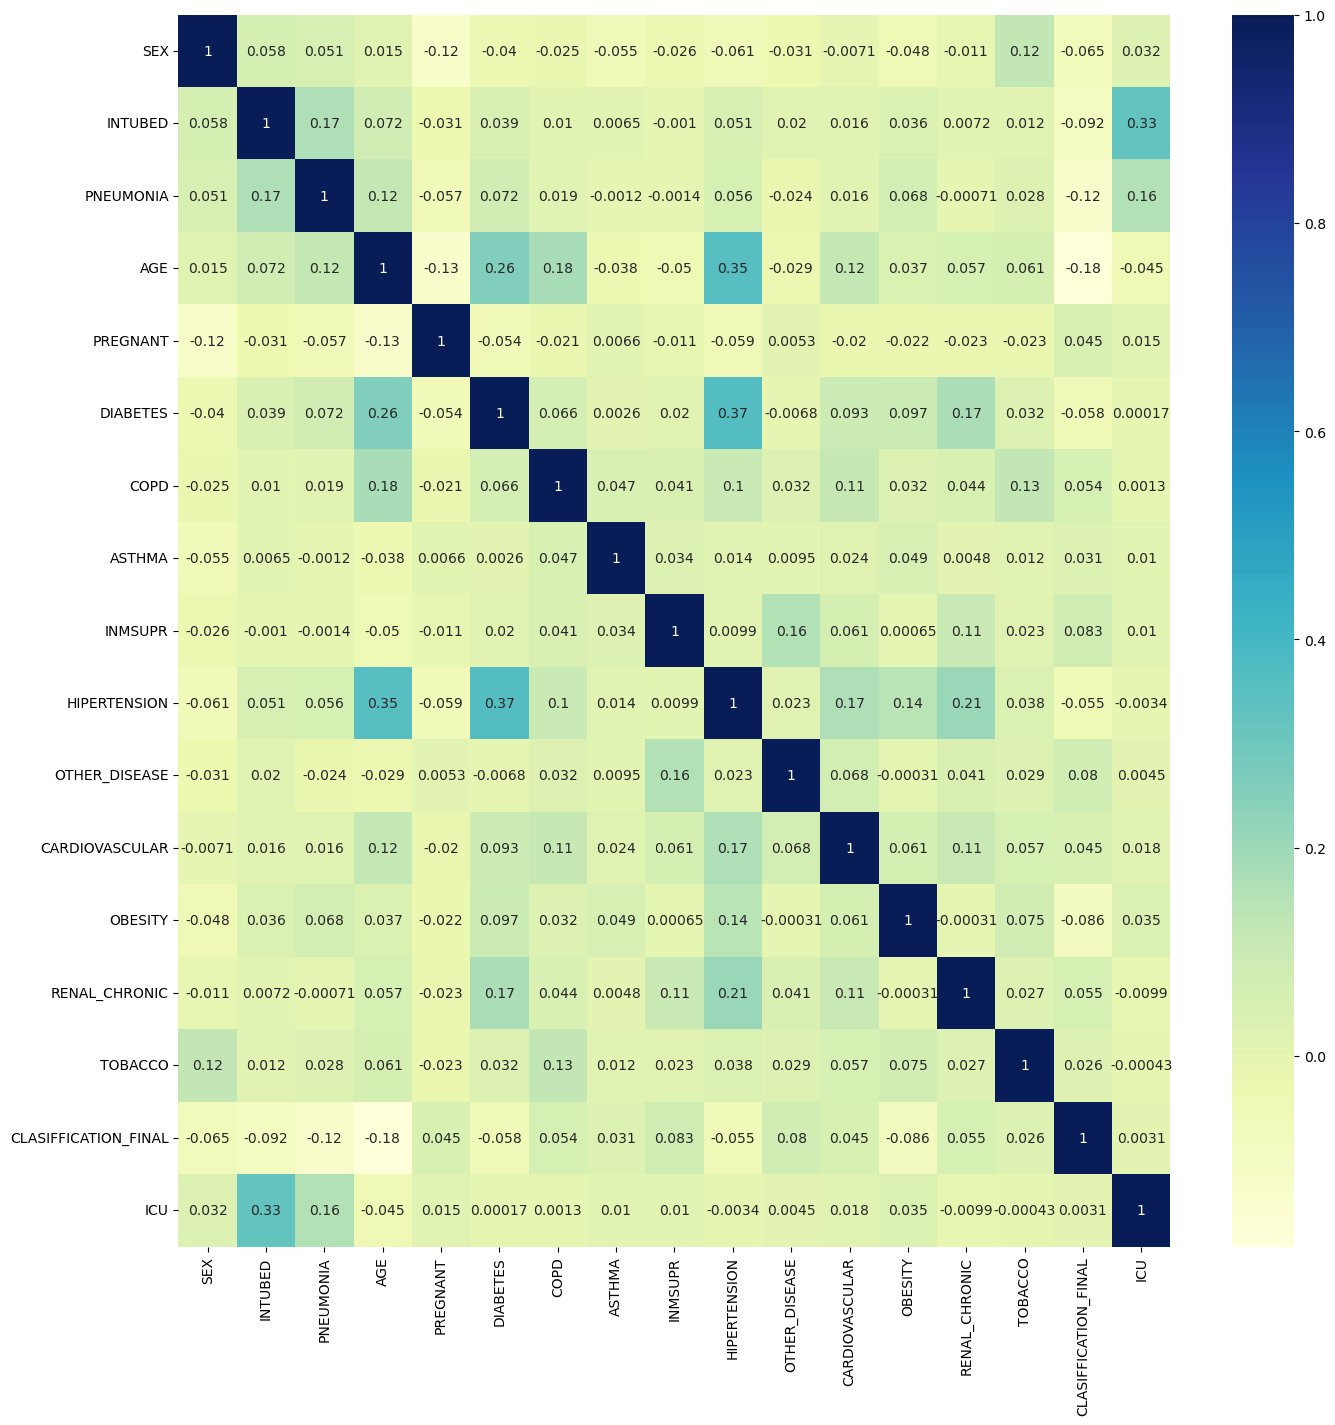

In [9]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

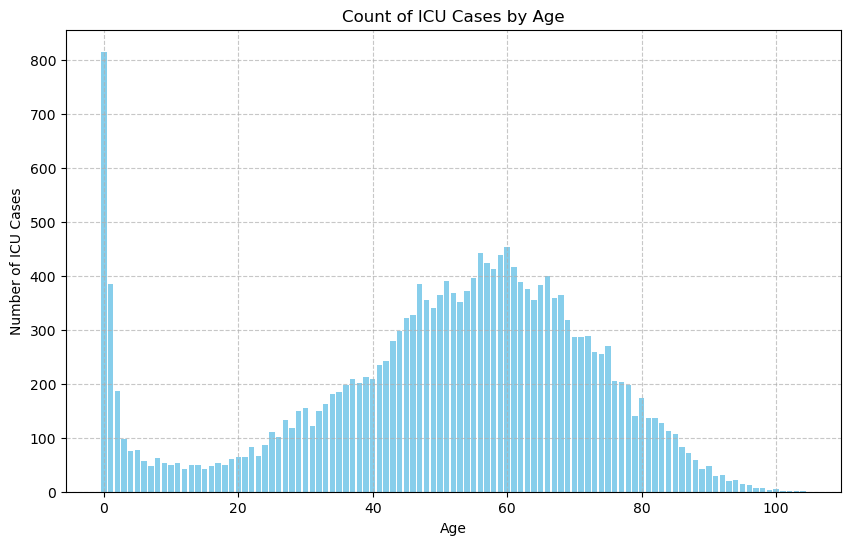

In [10]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import modules.modeling_pyspark as mdp

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)



Moving to improved Model:


Moving to K-Means clustering Model:



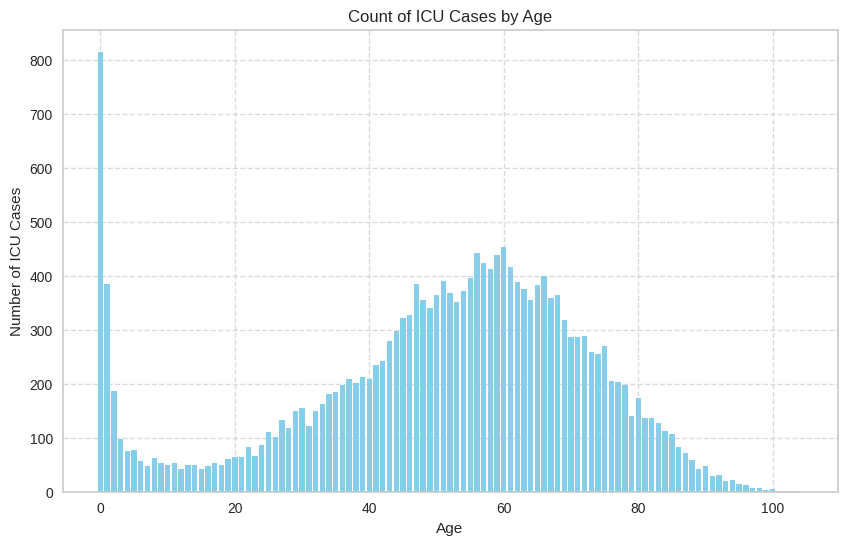

In [12]:
analytics_df = md.cleanDataForModeling(analytics_df)

icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.326269
PNEUMONIA         0.155660
OBESITY           0.035380
SEX               0.032110
CARDIOVASCULAR    0.017832
PREGNANT          0.015103
INMSUPR           0.010256
ASTHMA            0.010072
OTHER_DISEASE     0.004523
COPD              0.001298
DIABETES          0.000168
TOBACCO          -0.000426
HIPERTENSION     -0.003412
RENAL_CHRONIC    -0.009862
AGE              -0.044928
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
PNEUMONIA         0.045148
INTUBED           0.044271
SEX               0.030801
HIPERTENSION      0.011402
DIABETES          0.009545
OBESITY           0.005082
AGE               0.004119
OTHER_DISEASE     0.001043
RENAL_CHRONIC     0.000825
CARDIOVASCULAR    0.000809
COPD              0.000727
TOBACCO           0.000572
PREGNANT          

### Logistic Regression Model with PySpark

#### 1. 5 chosen features: 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY'

In [14]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'
# ['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE']
analytics_df = analytics_df_main[['SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY','ICU']]
analytics_df.to_csv('data/Dataset_revised_pyspark.csv', index=False)

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)

##### Apply Logistic Regression model with PySpark to dataset

25/04/10 16:40:48 WARN Utils: Your hostname, blinkpc resolves to a loopback address: 127.0.1.1; using 192.168.1.172 instead (on interface wlo1)
25/04/10 16:40:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/10 16:40:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

Training Accuracy: 0.9047910703348624
Test Accuracy: 0.9046096189881324
ROC AUC Score: 0.7683682748550859


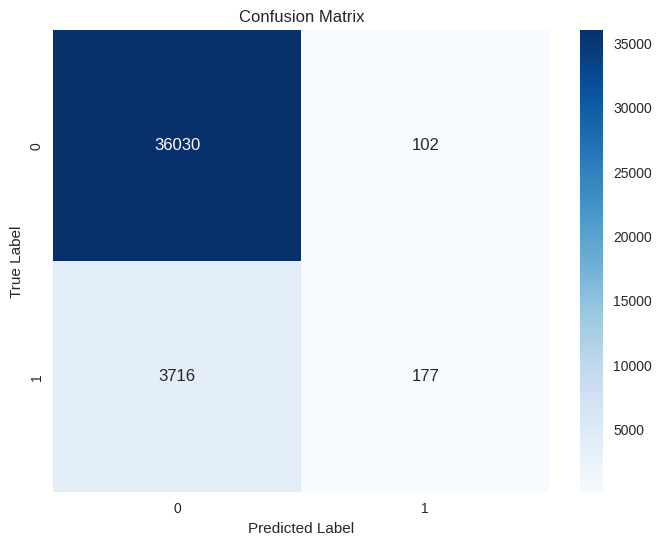


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     36132
           1       0.63      0.05      0.08      3893

    accuracy                           0.90     40025
   macro avg       0.77      0.52      0.52     40025
weighted avg       0.88      0.90      0.87     40025



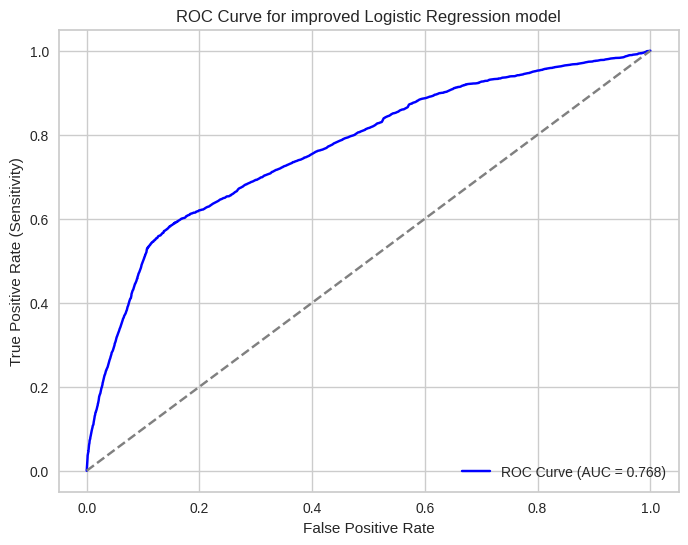

In [15]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv')

##### Apply Logistic Regression model to oversampling dataset

root
 |-- index: integer (nullable = true)
 |-- USMER: integer (nullable = true)
 |-- MEDICAL_UNIT: integer (nullable = true)
 |-- SEX: double (nullable = true)
 |-- DATE_DIED: string (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: double (nullable = true)
 |-- DIABETES: double (nullable = true)
 |-- COPD: double (nullable = true)
 |-- ASTHMA: double (nullable = true)
 |-- INMSUPR: double (nullable = true)
 |-- HIPERTENSION: double (nullable = true)
 |-- OTHER_DISEASE: double (nullable = true)
 |-- CARDIOVASCULAR: double (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- RENAL_CHRONIC: double (nullable = true)
 |-- TOBACCO: double (nullable = true)
 |-- CLASIFFICATION_FINAL: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+------------------+------------------+------------------+----------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+--------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+
|summary|             index|             USMER|      MEDICAL_UNIT|               SEX| DATE_DIED|            INTUBED|         PNEUMONIA|               AGE|            PREGNANT|           DIABETES|               COPD|             ASTHMA|             INMSUPR|      HIPERTENSION|      OTHER_DISEASE|     CARDIOVASCULAR|            OBESITY|       RENAL_CHRONIC|            TOBACCO|CLASIFFICATION_FINAL|                ICU|
+-------+------------------+------------------+------------------+------------------+----------+-------------------+------------------+------------------+----------

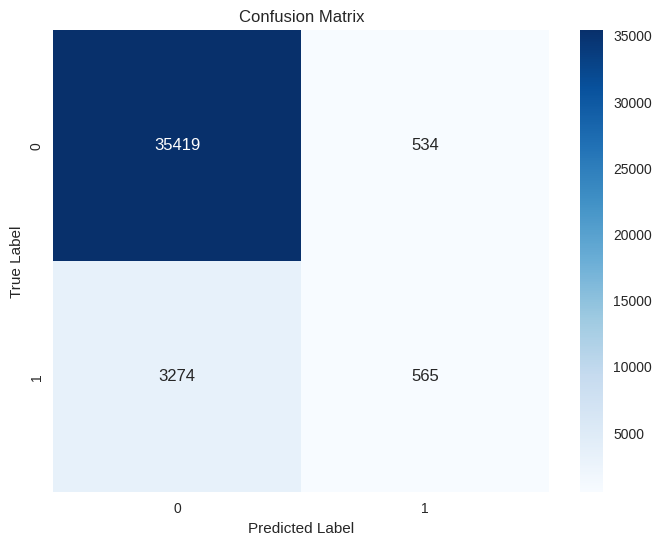


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     35953
           1       0.51      0.15      0.23      3839

    accuracy                           0.90     39792
   macro avg       0.71      0.57      0.59     39792
weighted avg       0.88      0.90      0.88     39792



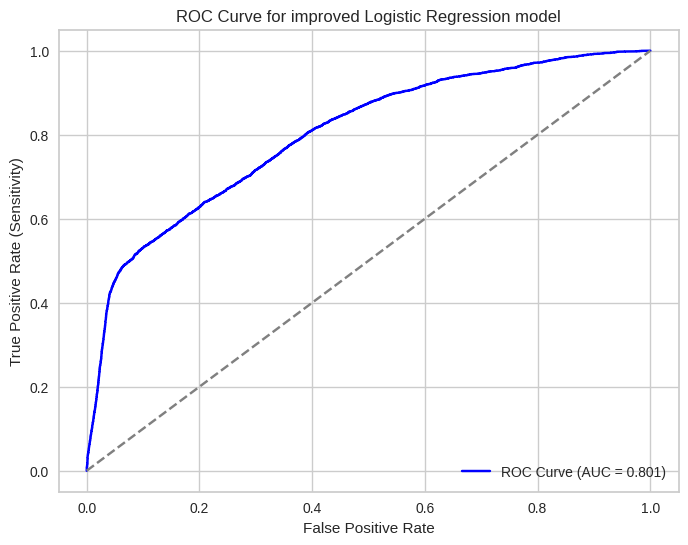

In [16]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_new.csv')

##### Apply Logistic Regression model to undersampling dataset

In [17]:
train_df = pd.DataFrame(X_under_train, columns=analytics_df.columns)
y_series = pd.Series(y_under_train)
train_df['ICU'] = y_series.values
ah.plot_multiple_metrics(df=train_df, columns=train_df.columns, figsize=(20, 20))

test_df = pd.DataFrame(X_under_test, columns=analytics_df.columns)
y_series = pd.Series(y_under_test)
test_df['ICU'] = y_series.values
ah.plot_multiple_metrics(df=test_df, columns=train_df.columns, figsize=(20, 20))


mdp.trainAndTestImprovedModel(train_df=train_df, test_df=test_df)

NameError: name 'X_under_train' is not defined

#### 2. 5 chosen features: 'SEX', 'PNEUMONIA', 'AGE', 'PREGNANT', 'OBESITY'

In [ ]:
# 5 chosen features: 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR'
analytics_df = analytics_df_main[['SEX', 'PNEUMONIA', 'AGE', 'PREGNANT', 'OBESITY', 'ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)

X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying SMOTE: (252730, 5)
y_train shape after applying SMOTE: (252730,)
--------------------------------------------------
X_train shape: (140021, 5)
X_test shape: (60010, 5)
y_train shape: (140021,)
y_test shape: (60010,)
X_train shape after applying NearMiss (27312, 5)
y_train shape after applying NearMiss: (27312,)


##### Apply Logistic Regression model to original dataset

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Model: Logistic Regression
Training Accuracy: 0.9024717720913291
Test Accuracy: 0.9024662556240627

Cross-Validation Accuracy Scores: [0.90244599 0.90247822 0.90247822 0.90247822 0.90247822]
Mean CV Accuracy Score: 0.902471772275448
Standard Deviation of CV Scores: 1.2890244133512141e-05
ROC AUC Score: 0.6623494020954024


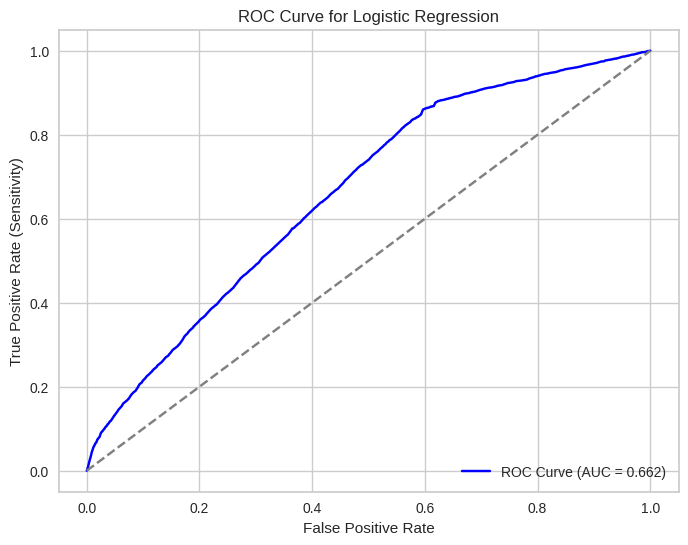

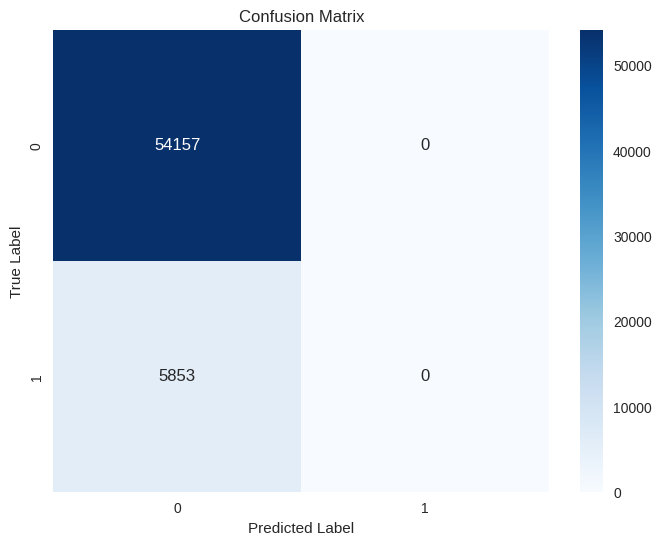


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     54157
         1.0       0.00      0.00      0.00      5853

    accuracy                           0.90     60010
   macro avg       0.45      0.50      0.47     60010
weighted avg       0.81      0.90      0.86     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC Score: 0.6623494020954024


/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [ ]:
md.logistic_regression_model(training_set={'X': X_train, 'Y': y_train} , test_set={'X': X_test, 'Y': y_test}, solver='liblinear', class_weight=None) #{0:1, 1:5}

##### Apply Logistic Regression model to oversampling dataset


Model: Logistic Regression
Training Accuracy: 0.62365370157876
Test Accuracy: 0.4971004832527912

Cross-Validation Accuracy Scores: [0.62675583 0.6242037  0.62224508 0.62479721 0.62016777]
Mean CV Accuracy Score: 0.6236339176195941
Standard Deviation of CV Scores: 0.002252433074897934
ROC AUC Score: 0.6626037833362217


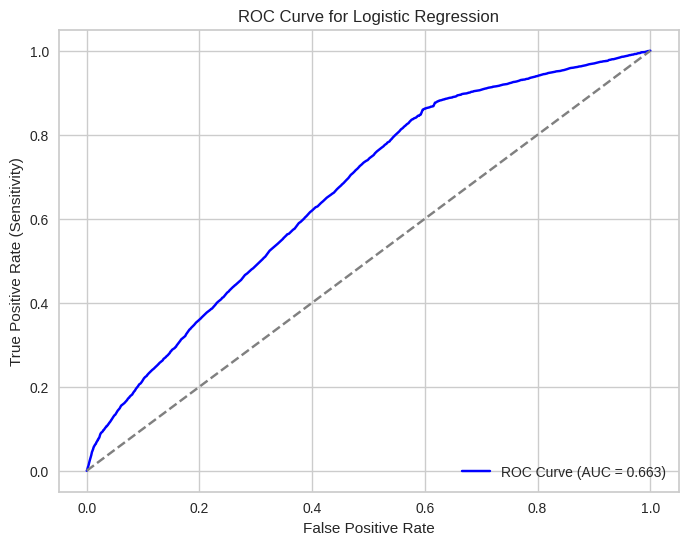

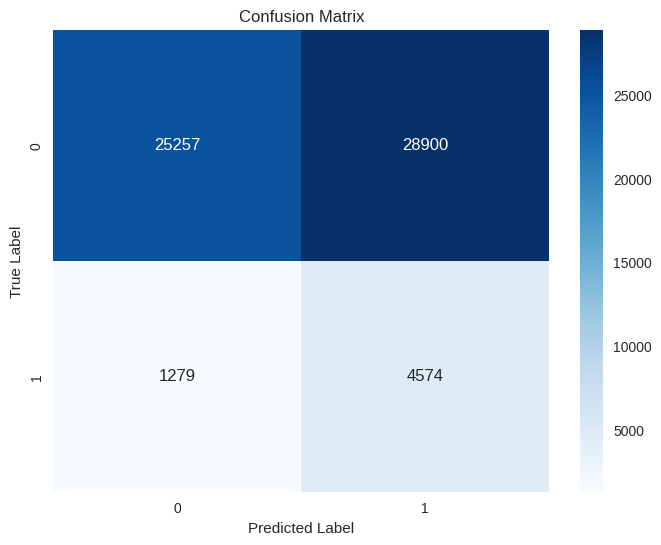


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63     54157
         1.0       0.14      0.78      0.23      5853

    accuracy                           0.50     60010
   macro avg       0.54      0.62      0.43     60010
weighted avg       0.87      0.50      0.59     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.13664336499970126
Recall: 0.7814795831197676
F1-Score: 0.23261372593892238
ROC AUC Score: 0.6626037833362217


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [ ]:
md.logistic_regression_model(training_set={'X': X_over_train, 'Y': y_over_train}
                       , test_set={'X': X_over_test, 'Y': y_over_test}
                       , solver='liblinear', class_weight=None)

##### Apply Logistic Regression model to undersampling dataset


Model: Logistic Regression
Training Accuracy: 0.6108670181605155
Test Accuracy: 0.5123312781203133

Cross-Validation Accuracy Scores: [0.61138569 0.61193483 0.61735628 0.60600513 0.61113145]
Mean CV Accuracy Score: 0.6115626759238426
Standard Deviation of CV Scores: 0.0036002217414143486
ROC AUC Score: 0.6596215281360736


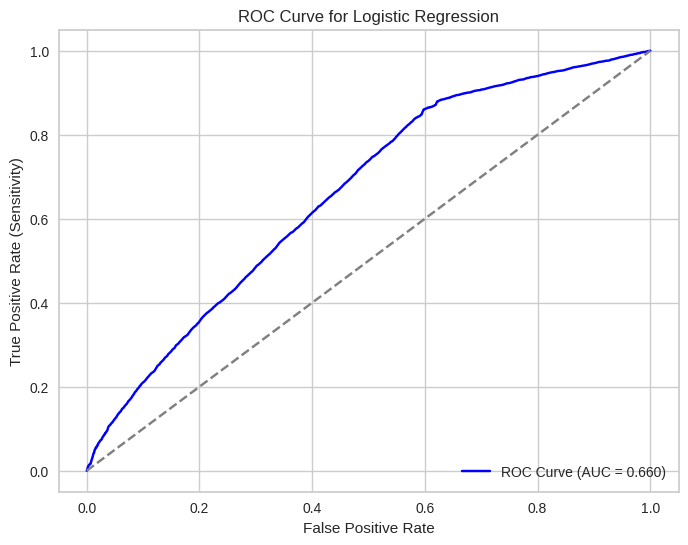

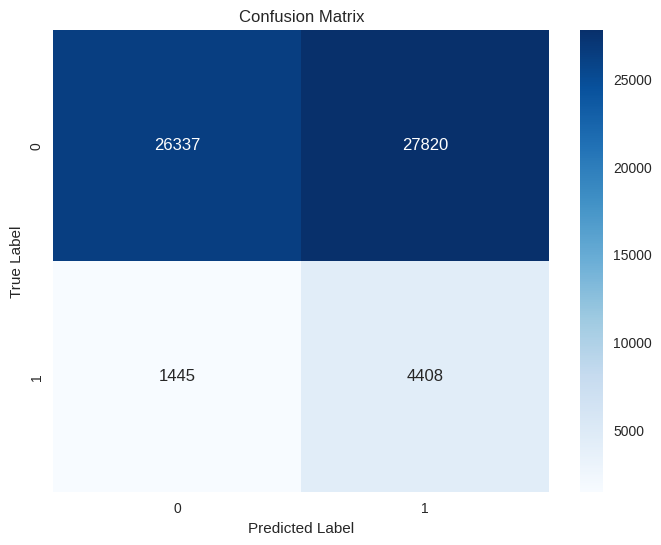


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.49      0.64     54157
         1.0       0.14      0.75      0.23      5853

    accuracy                           0.51     60010
   macro avg       0.54      0.62      0.44     60010
weighted avg       0.87      0.51      0.60     60010


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.13677547474245996
Recall: 0.7531180591149838
F1-Score: 0.2315065255639295
ROC AUC Score: 0.6596215281360736


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [ ]:
md.logistic_regression_model(training_set={'X': X_under_train, 'Y': y_under_train} 
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , solver='liblinear', class_weight=None)